In [15]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
import statsmodels.stats.diagnostic as cu
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
real_gdp_log = pd.read_csv("real_gdp_log.csv", index_col="Year")
total_work_hours_log = pd.read_csv("total_work_hours_log2.csv", index_col="Year")
capital_stock_log = pd.read_csv("capital_stock_log.csv", index_col="Year")

employment = pd.read_csv("employment.csv", index_col="Year")


In [17]:
total_work_hours_log

,Korea,Japan,USA
Year,,,
1955,NaN,NaN,18.640034
1956,NaN,NaN,18.665420
1957,NaN,NaN,18.655010
1958,NaN,NaN,18.625512
1959,NaN,NaN,18.656110
...,...,...,...
2016,17.893908,18.524127,19.411161
2017,17.901130,18.532311,19.423640
2018,17.873917,18.536307,19.441570


In [9]:
usa = pd.concat([real_gdp_log['United States'], capital_stock_log['USA'], total_work_hours_log['USA']], axis=1).dropna()
usa.columns = ['lnY', 'lnK', 'lnL']
usa['trend'] = range(1, len(usa)+1)
usa['intercept'] = np.ones(len(usa))
usa['first_dummy'] = np.zeros(len(usa))
print(usa)
usa.at[1982:1984, 'first_dummy'] =1
usa

            lnY        lnK        lnL  trend  intercept  first_dummy
Year                                                                
1960  28.871477  16.504169  18.670620      1        1.0          0.0
1961  28.894216  16.537153  18.664504      2        1.0          0.0
1962  28.953428  16.572959  18.688697      3        1.0          0.0
1963  28.996488  16.610436  18.710573      4        1.0          0.0
1964  29.052868  16.650116  18.734587      5        1.0          0.0
1965  29.114903  16.692038  18.764545      6        1.0          0.0
1966  29.177878  16.734955  18.784636      7        1.0          0.0
1967  29.202571  16.773725  18.792927      8        1.0          0.0
1968  29.249454  16.812002  18.807879      9        1.0          0.0
1969  29.279983  16.848548  18.832614     10        1.0          0.0
1970  29.276508  16.879117  18.826405     11        1.0          0.0
1971  29.308914  16.909221  18.828278     12        1.0          0.0
1972  29.360167  16.942504  18.860

InvalidIndexError: slice(1982, 1984, None)

In [204]:
japan = pd.concat([real_gdp_log['Japan'], capital_stock_log['Japan'], total_work_hours_log['Japan']], axis=1).dropna()
japan.columns = ['lnY', 'lnK', 'lnL']
japan['trend'] = np.log(range(1, len(japan)+1))
japan['intercept'] = np.ones(len(japan))
japan


,lnY,lnK,lnL,trend,intercept
Year,,,,,
1970,26.919705,15.477723,18.553957,0.000000,1.0
1971,26.991862,15.595414,18.557637,0.693147,1.0
1972,27.218209,15.708076,18.557096,1.098612,1.0
1973,27.405071,15.819373,18.566948,1.386294,1.0
1974,27.320410,15.902431,18.533216,1.609438,1.0
1975,27.334878,15.974494,18.518739,1.791759,1.0
1976,27.374650,16.041853,18.535403,1.945910,1.0
1977,27.516953,16.105077,18.549286,2.079442,1.0
1978,27.812007,16.169214,18.558759,2.197225,1.0


In [ ]:
korea = pd.concat([real_gdp_log['Japan'], capital_stock_log['Japan'], total_work_hours_log['Japan']], axis=1).dropna()
japan.columns = ['lnY', 'lnK', 'lnL']
japan['trend'] = np.log(range(1, len(japan)+1))
japan['intercept'] = np.ones(len(japan))
japan


In [206]:
len(japan)

50

In [278]:
Y = usa['lnY'].to_numpy()
Y_avg = np.average(Y)
X = usa[['intercept', 'trend', 'lnK', 'lnL', 'first_dummy']].to_numpy()

N = 50
K = 5

XX = X.transpose().dot(X)
XX_inv = np.linalg.inv(XX)
XY = X.transpose().dot(Y)

beta = XX_inv.dot(XY)



In [279]:
Y_hat = X.dot(beta)
Y_hat_avg = np.average(Y_hat)
resid = Y - Y_hat

SSR = resid**2
SSE = (Y_hat - Y_hat_avg)**2
SST = (Y - Y_avg)**2
SST

e_std_dev = SSR.sum()/(N-K)
R_square = SSE.sum()/SST.sum()
adj_R_square = 1 - ( (SSR.sum()/(N-K)) / (SST.sum()/N) )


In [280]:
beta_var = e_std_dev * XX_inv
beta_var_diag =np.diag(beta_var)
beta_var_inv = np.linalg.inv(beta_var)
beta_var_inv_dig = np.diag(beta_var_inv)

std_dev_beta = np.sqrt(beta_var_diag)
t_value = beta/std_dev_beta

In [256]:
R = np.array([[0, 0, 1, 1], [1, 0, 0, 0]])
r = np.array([[1, 0]])

In [229]:
np.linalg.inv(np.matmul(R, np.matmul(XX_inv, R.transpose())))

RVR_inv = np.linalg.inv(np.matmul(np.matmul(R, beta_var), R.transpose()))
RVR_inv

Rb = (np.matmul(R, beta)-r).transpose()

np.matmul(RVR_inv, Rb)

chai_sq = np.matmul(Rb.transpose(), np.matmul(RVR_inv, Rb))
chai_sq

#F = chai_sq / 2

array([[2865.08587018]])

In [212]:
pd.DataFrame(chai_sq)

,0
0,3.090227


In [273]:
cu.breaks_cusumolsresid(resid, ddof=4)

(1.1249663131045695, 0.15906296097793685, [(1, 1.63), (5, 1.36), (10, 1.22)])

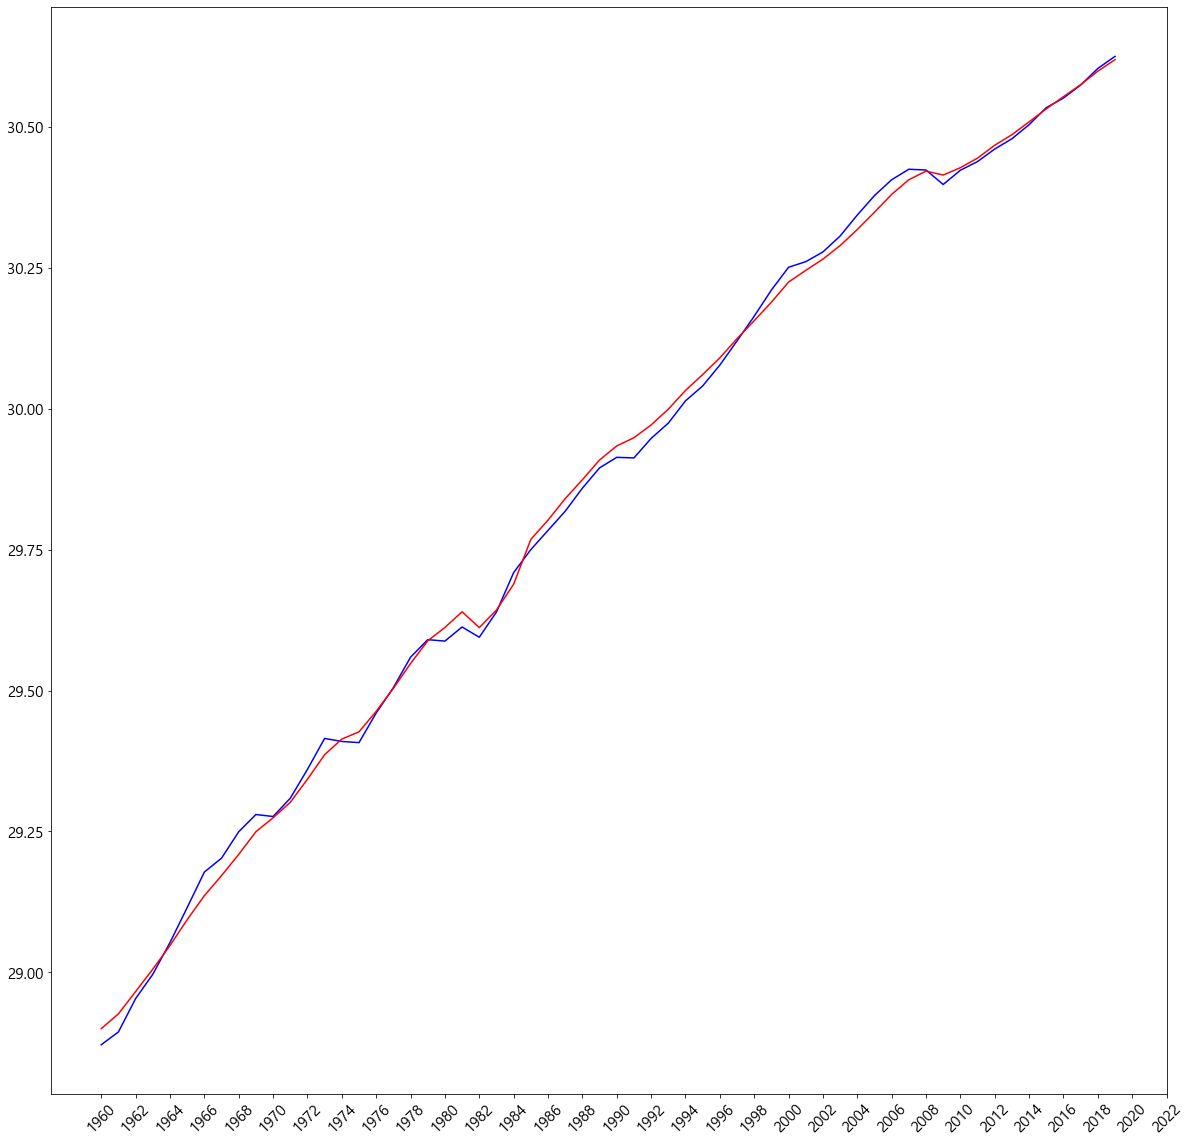

In [281]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(usa.index, Y, color='blue')
plt.plot(usa.index, Y_hat, color='red')
plt.xticks(range(1960, 2024, 2), rotation=45)
plt.show()

c:\Users\kimjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\kimjo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\kimjo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


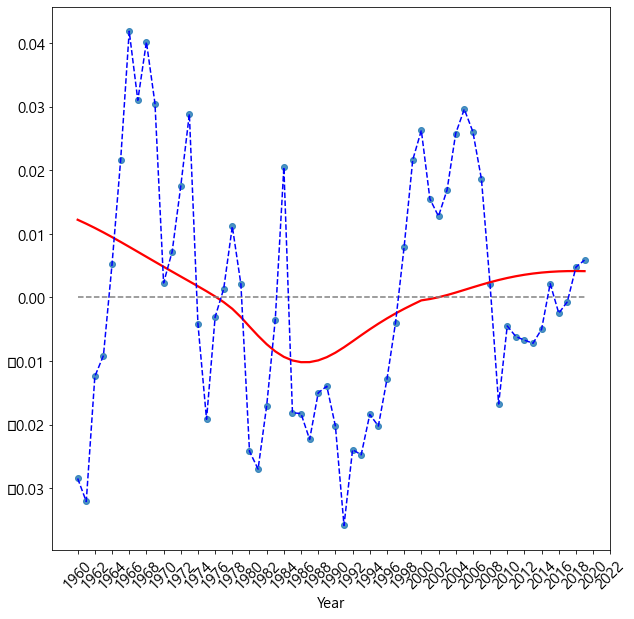

In [282]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.regplot(usa.index, resid, lowess=True, line_kws={'color': 'red'})
plt.plot([usa.index.min(), usa.index.max()], [0, 0], '--', color='grey')
plt.plot(usa.index, resid, '--', color='blue')
plt.xticks(range(1960, 2024, 2), rotation=45)
plt.show()

In [24]:
employment = np.log(employment)
employment

,Korea,Japan,USA
Year,,,
1955,NaN,2.362624,2.401311
1956,NaN,2.364468,2.403653
1957,NaN,2.366894,2.404031
1958,NaN,2.367280,2.402563
1959,NaN,2.368112,2.404820
...,...,...,...
2016,2.320569,2.404920,2.478882
2017,2.321735,2.405922,2.479927
2018,2.322092,2.407824,2.481240


In [7]:
real_gdp_log

,"Korea, Rep.",Japan,United States
Year,,,
1960,26.855618,26.002524,28.871477
1961,26.241150,26.116241,28.894216
1962,26.238474,26.201583,28.953428
1963,26.324841,26.282920,28.996488
1964,25.917631,26.393358,29.052868
...,...,...,...
2016,28.016894,29.237004,30.551516
2017,28.074202,29.223084,30.574574
2018,28.129693,29.244317,30.604100


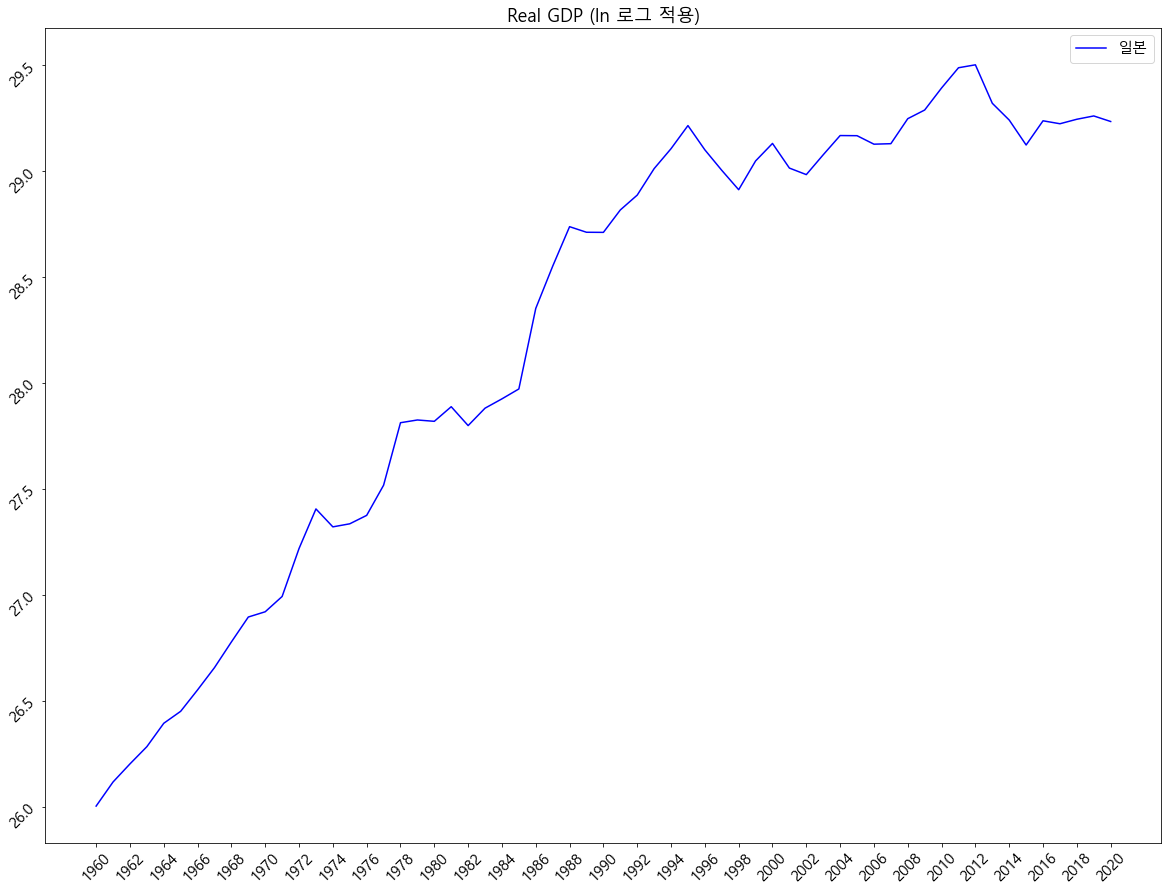

In [8]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
#plt.plot(real_gdp_log.index, real_gdp_log['Korea, Rep.'], label='한국', color='red')
plt.plot(real_gdp_log.index, real_gdp_log['Japan'], label='일본', color='blue')
#plt.plot(real_gdp_log.index, real_gdp_log['United States'], label='미국', color='green')
plt.title('Real GDP (ln 로그 적용)')
plt.legend()
plt.xticks(np.arange(1960,2022,2),rotation=45)
plt.yticks(rotation=45)
plt.show()

In [22]:
total_work_hours_log

,Korea,Japan,USA
Year,,,
1955,NaN,NaN,18.640034
1956,NaN,NaN,18.665420
1957,NaN,NaN,18.655010
1958,NaN,NaN,18.625512
1959,NaN,NaN,18.656110
...,...,...,...
2016,17.815802,18.524127,19.411161
2017,17.803211,18.532311,19.423640
2018,17.794377,18.536307,19.441570


In [10]:
capital_stock_log

,Korea,Japan,USA
Year,,,
1953,12.209763,13.910443,16.273628
1954,12.199356,13.949516,16.306531
1955,12.192178,13.997038,16.342219
1956,12.183759,14.052875,16.376359
1957,12.190783,14.121253,16.408598
...,...,...,...
2015,16.099286,17.066721,17.990787
2016,16.132881,17.069011,18.004772
2017,16.171157,17.072314,18.019348


In [18]:
korea = pd.concat([capital_stock_log['Korea'], real_gdp_log['Korea, Rep.'], total_work_hours_log['Korea']], axis=1)
korea.columns = ['Capital_stock', 'Real_gdp', 'Work_hours']
korea.dropna(axis=0, inplace=True)


In [23]:
korea['Time'] = (range(1, len(korea)+1))

In [24]:
korea

,Capital_stock,Real_gdp,Work_hours,Time
Year,,,,
1983,13.838709,26.417000,17.548049,1
1984,13.932134,26.479084,17.537377,2
1985,14.020440,26.478093,17.574208,3
1986,14.114044,26.572349,17.587281,4
1987,14.217278,26.761249,17.669855,5
1988,14.323022,26.991848,17.706270,6
1989,14.433782,27.145788,17.722856,7
1990,14.561260,27.187336,17.739342,8
1991,14.688802,27.254176,17.762589,9


In [32]:
model = ols("Real_gdp ~ Capital_stock + Work_hours", data = korea).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Real_gdp   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 29 May 2022   Prob (F-statistic):           5.30e-19
Time:                        15:04:01   Log-Likelihood:                 19.791
No. Observations:                  37   AIC:                            -33.58
Df Residuals:                      34   BIC:                            -28.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.3975     10.103     -0.930      0.359     -29.928      11.133
Capital_stock     0.4205      0.088      4.776      0.000       0.242       0.599
Work_hours        1.7090      0.637      2.683      0.011       0.415       3.003
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.438
Skew:                          -1.169   Prob(JB):                      0.00892
Kurtosis:                       3.808   Cond. No.                     9.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


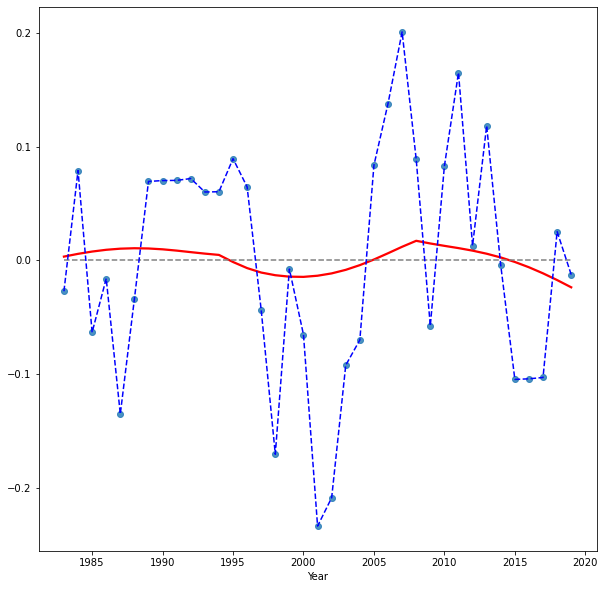

In [26]:
fitted = model.predict(korea)
residual = korea['Real_gdp'] - fitted

plt.rcParams["figure.figsize"] = (10, 10)
sns.regplot(residual.index, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([residual.index.min(), residual.index.max()], [0, 0], '--', color='grey')
plt.plot(residual.index, residual, '--', color='blue')

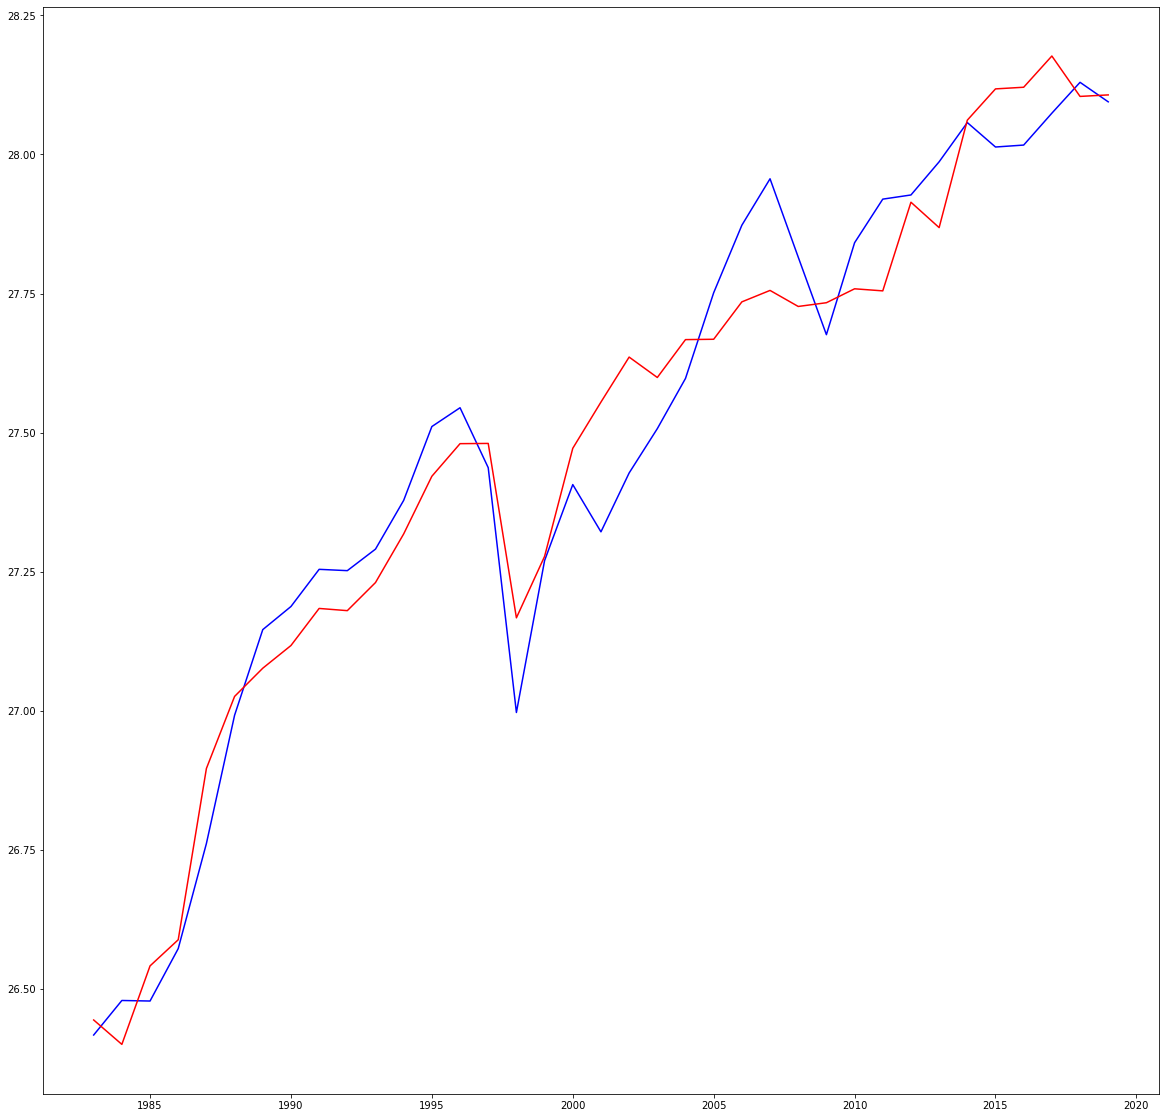

In [27]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(korea.index, korea['Real_gdp'], color='blue')
plt.plot(fitted.index, fitted, color='red')

c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


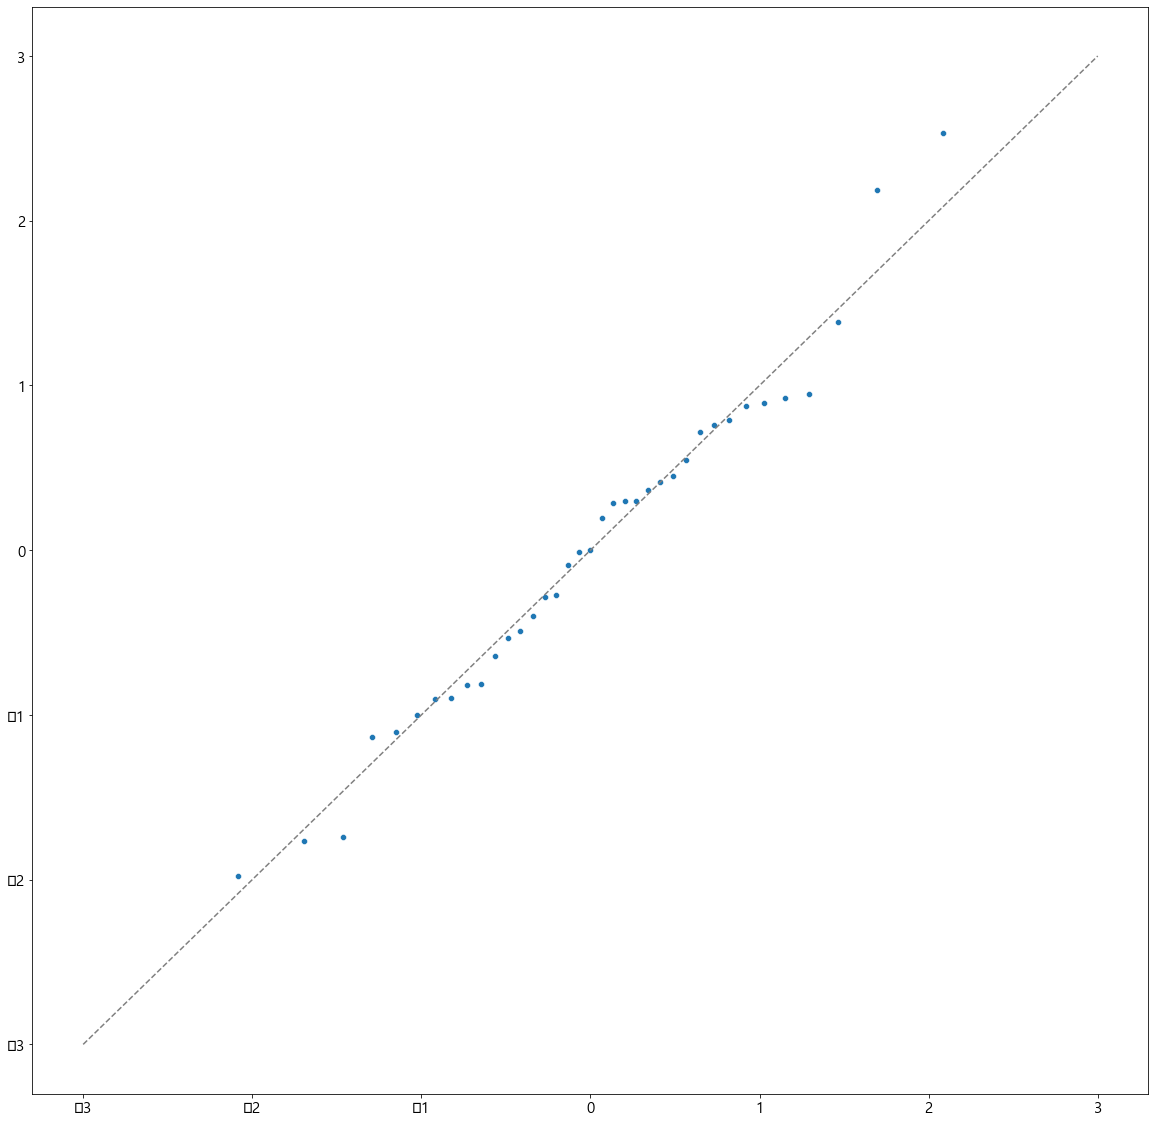

In [16]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [283]:
usa = pd.concat([capital_stock_log['USA'], real_gdp_log['United States'], total_work_hours_log['USA']], axis=1)
usa.columns = ['Capital_stock', 'Real_gdp', 'Work_hours']
usa.dropna(axis=0, inplace=True)
usa['Time'] = (range(1, len(usa)+1))
usa['first_dummy'] = np.zeros(len(usa))
usa.at[1982:1984, 'first_dummy'] =1
usa

,Capital_stock,Real_gdp,Work_hours,Time,first_dummy
Year,,,,,
1960,16.504169,28.871477,18.670620,1,0.0
1961,16.537153,28.894216,18.664504,2,0.0
1962,16.572959,28.953428,18.688697,3,0.0
1963,16.610436,28.996488,18.710573,4,0.0
1964,16.650116,29.052868,18.734587,5,0.0
1965,16.692038,29.114903,18.764545,6,0.0
1966,16.734955,29.177878,18.784636,7,0.0
1967,16.773725,29.202571,18.792927,8,0.0
1968,16.812002,29.249454,18.807879,9,0.0


In [284]:
model = ols("Real_gdp ~ Capital_stock + Work_hours + Time + first_dummy", data = usa).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Real_gdp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9843.
Date:                Tue, 24 May 2022   Prob (F-statistic):           8.51e-78
Time:                        23:22:58   Log-Likelihood:                 152.21
No. Observations:                  60   AIC:                            -294.4
Df Residuals:                      55   BIC:                            -284.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0939      0.974     11.385      0.000       9.141      13.047
Capital_stock     0.6554      0.088      7.442      0.000       0.479       0.832
Work_hours        0.3739      0.090      4.135      0.000       0.193       0.555
Time              0.0070      0.002      4.647      0.000       0.004       0.010
first_dummy      -0.0438      0.012     -3.596      0.001      -0.068      -0.019
==============================================================================
Omnibus:                        3.896   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.372
Skew:                           0.271   Prob(JB):                        0.305
Kurtosis:                       2.190   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\kimjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c:\Users\kimjo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\kimjo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


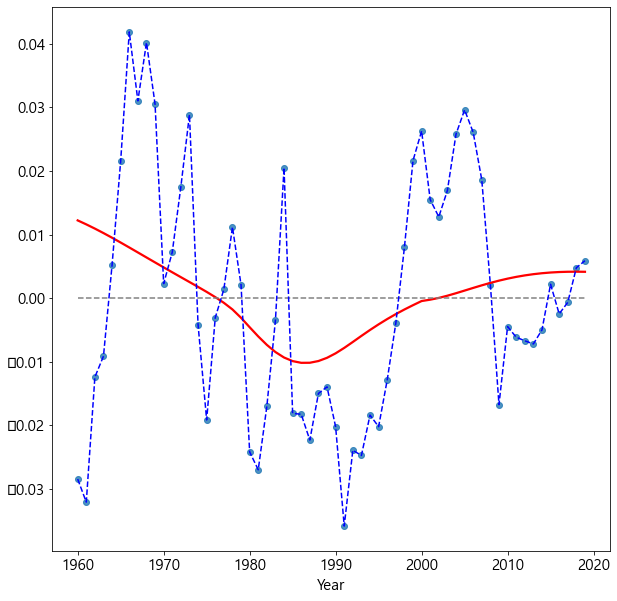

In [285]:
fitted = model.predict(usa)
residual = usa['Real_gdp'] - fitted

plt.rcParams["figure.figsize"] = (10, 10)
sns.regplot(residual.index, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([residual.index.min(), residual.index.max()], [0, 0], '--', color='grey')
plt.plot(residual.index, residual, '--', color='blue')

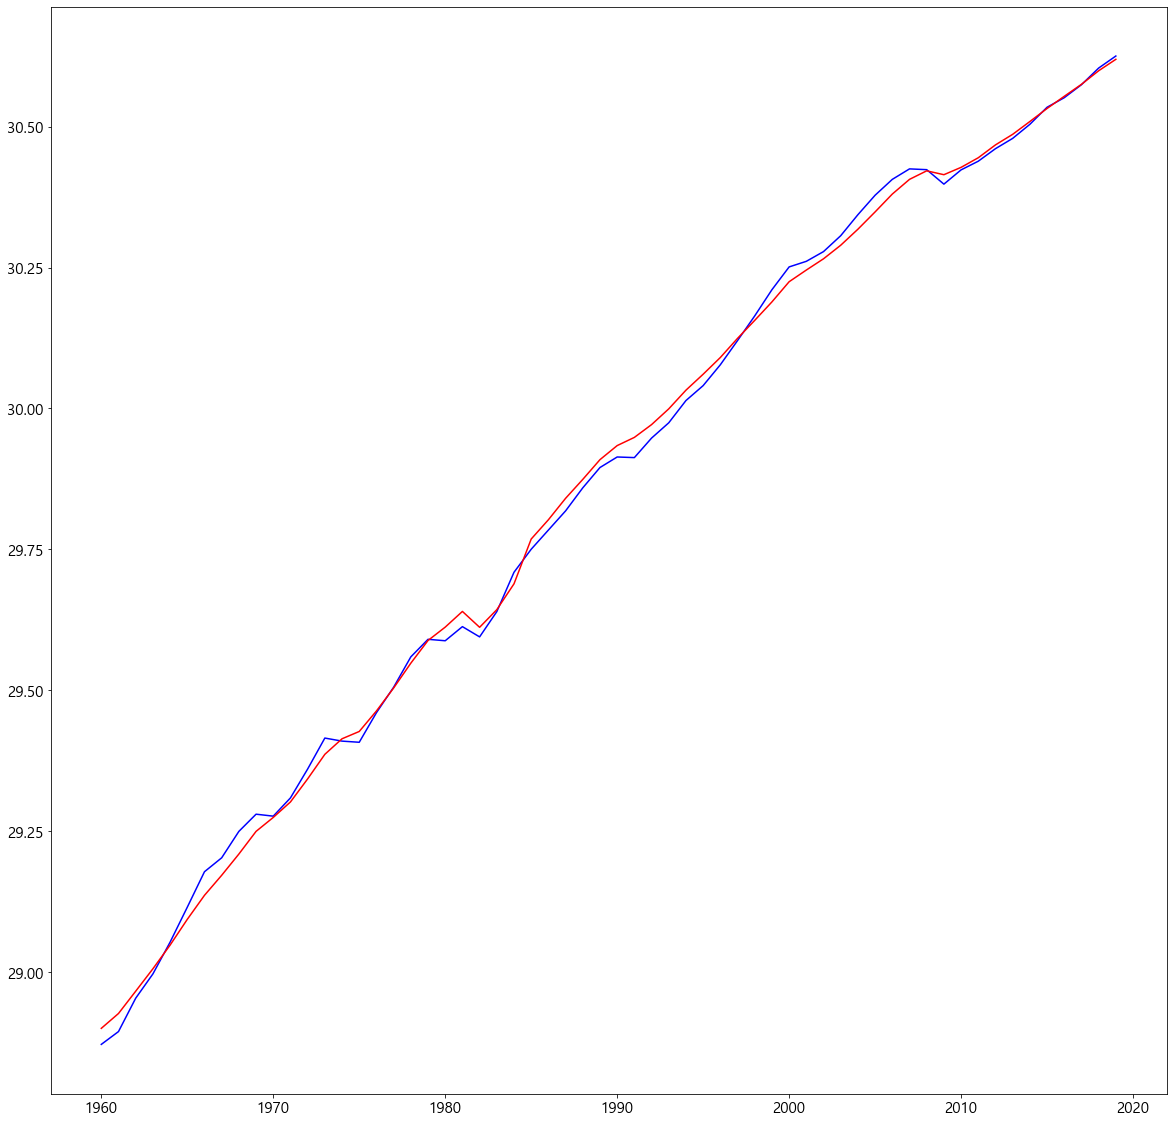

In [286]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(usa.index, usa['Real_gdp'], color='blue')
plt.plot(fitted.index, fitted, color='red')

c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


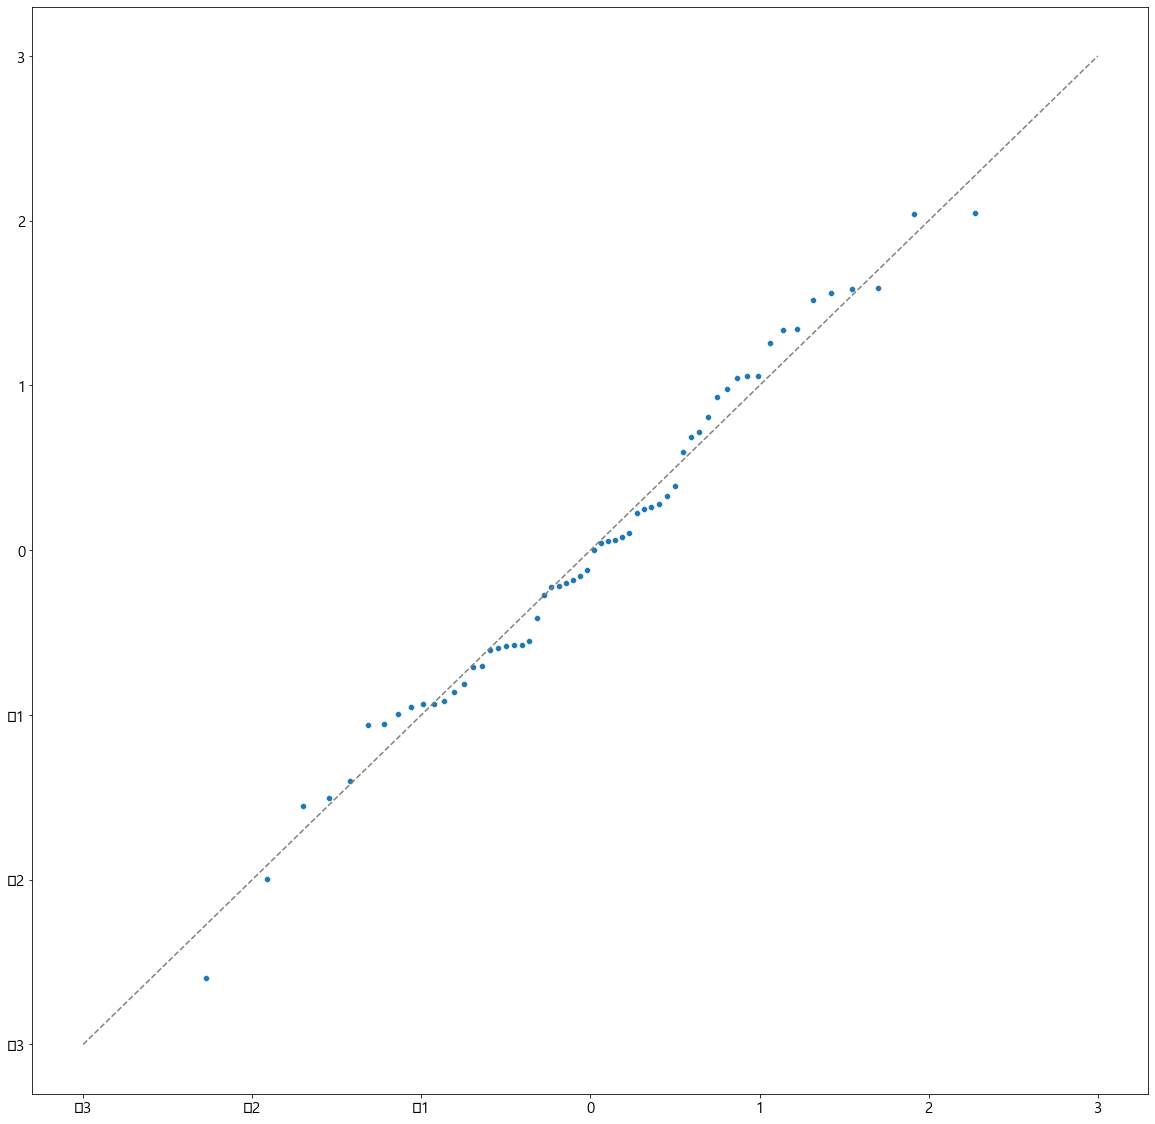

In [21]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [28]:
japan = pd.concat([capital_stock_log['Japan'], real_gdp_log['Japan'], employment['Japan']], axis=1)
japan.columns = ['Capital_stock', 'Real_gdp', 'Work_hours']
japan.dropna(axis=0, inplace=True)
japan['Time'] = range(1, len(japan)+1)
japan

,Capital_stock,Real_gdp,Work_hours,Time
Year,,,,
1960,14.350387,26.002524,44380.83,1
1961,14.460744,26.116241,44976.67,2
1962,14.564819,26.201583,45553.33,3
1963,14.668260,26.282920,45936.67,4
1964,14.777377,26.393358,46550.00,5
1965,14.875540,26.449925,47288.33,6
1966,14.977129,26.551023,48272.50,7
1967,15.090368,26.656124,49197.50,8
1968,15.214601,26.777300,50016.67,9


In [30]:
model = ols("Real_gdp ~ Capital_stock + Work_hours + Time", data = japan).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Real_gdp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sun, 29 May 2022   Prob (F-statistic):           4.94e-49
Time:                        15:02:43   Log-Likelihood:                 32.070
No. Observations:                  60   AIC:                            -56.14
Df Residuals:                      56   BIC:                            -47.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.8566      1.029     15.407      0.000      13.795      17.918
Capital_stock     0.4992      0.097      5.155      0.000       0.305       0.693
Work_hours     6.491e-05   1.29e-05      5.034      0.000    3.91e-05    9.07e-05
Time              0.0135      0.003      4.551      0.000       0.008       0.019
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.205
Skew:                           0.138   Prob(JB):                        0.903
Kurtosis:                       2.926   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
6.491e-05

6.491e-05

c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


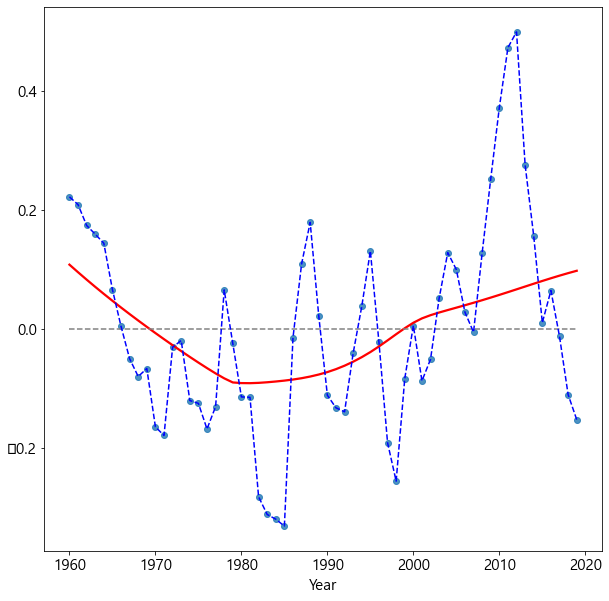

In [176]:
fitted = model.predict(japan)
residual = japan['Real_gdp'] - fitted

plt.rcParams["figure.figsize"] = (10, 10)
sns.regplot(residual.index, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([residual.index.min(), residual.index.max()], [0, 0], '--', color='grey')
plt.plot(residual.index, residual, '--', color='blue')
#[출처] [파이썬 데이터 사이언스] 단순선형회귀분석(Simple Linear Regression Analysis)|작성자 친절한 박선생

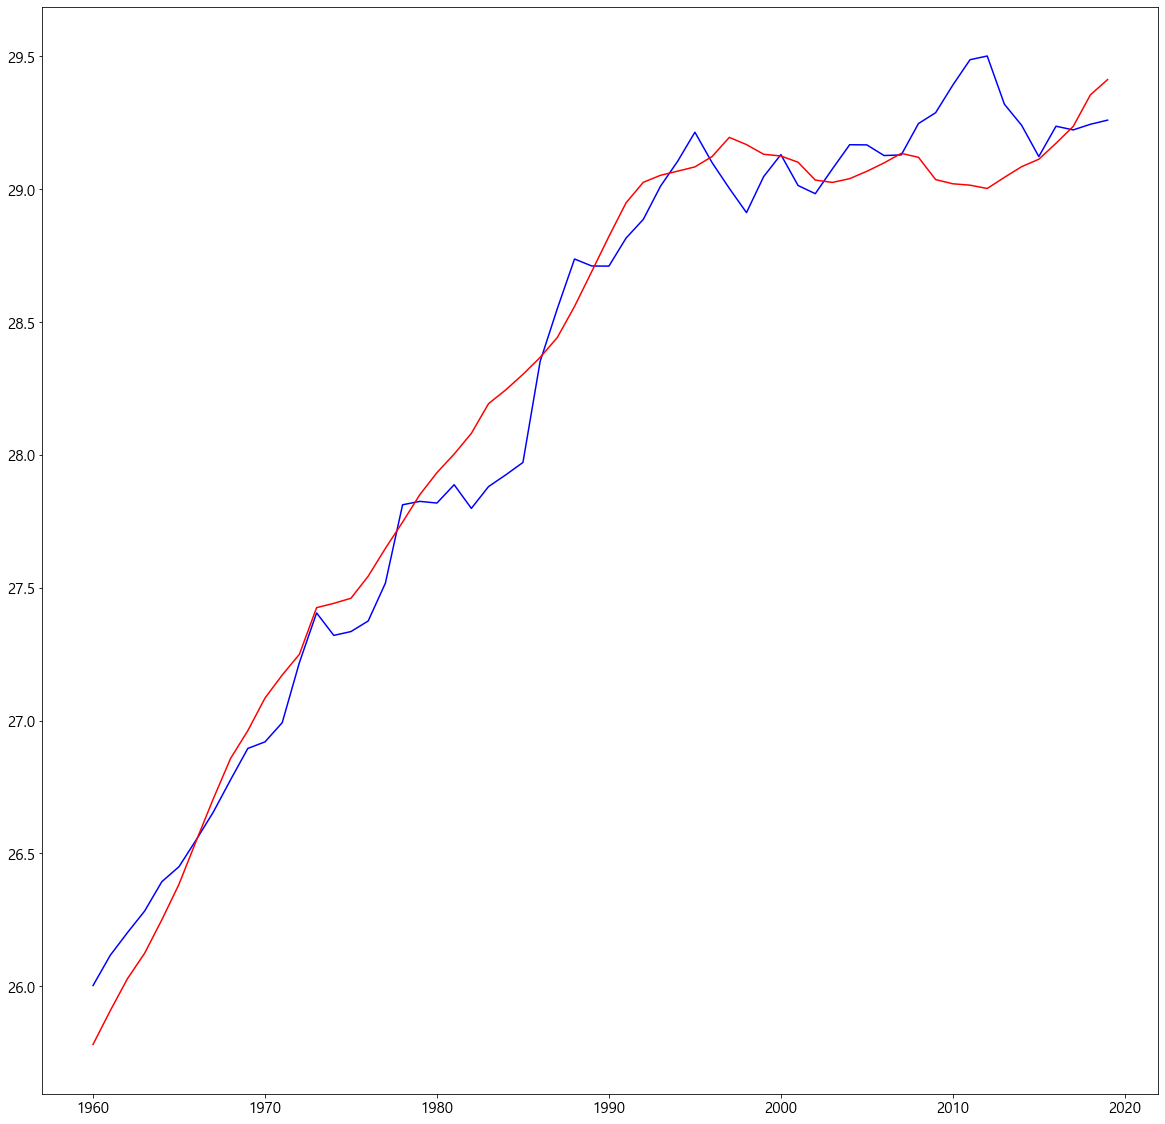

In [177]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(japan.index, japan['Real_gdp'], color='blue')
plt.plot(fitted.index, fitted, color='red')

c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


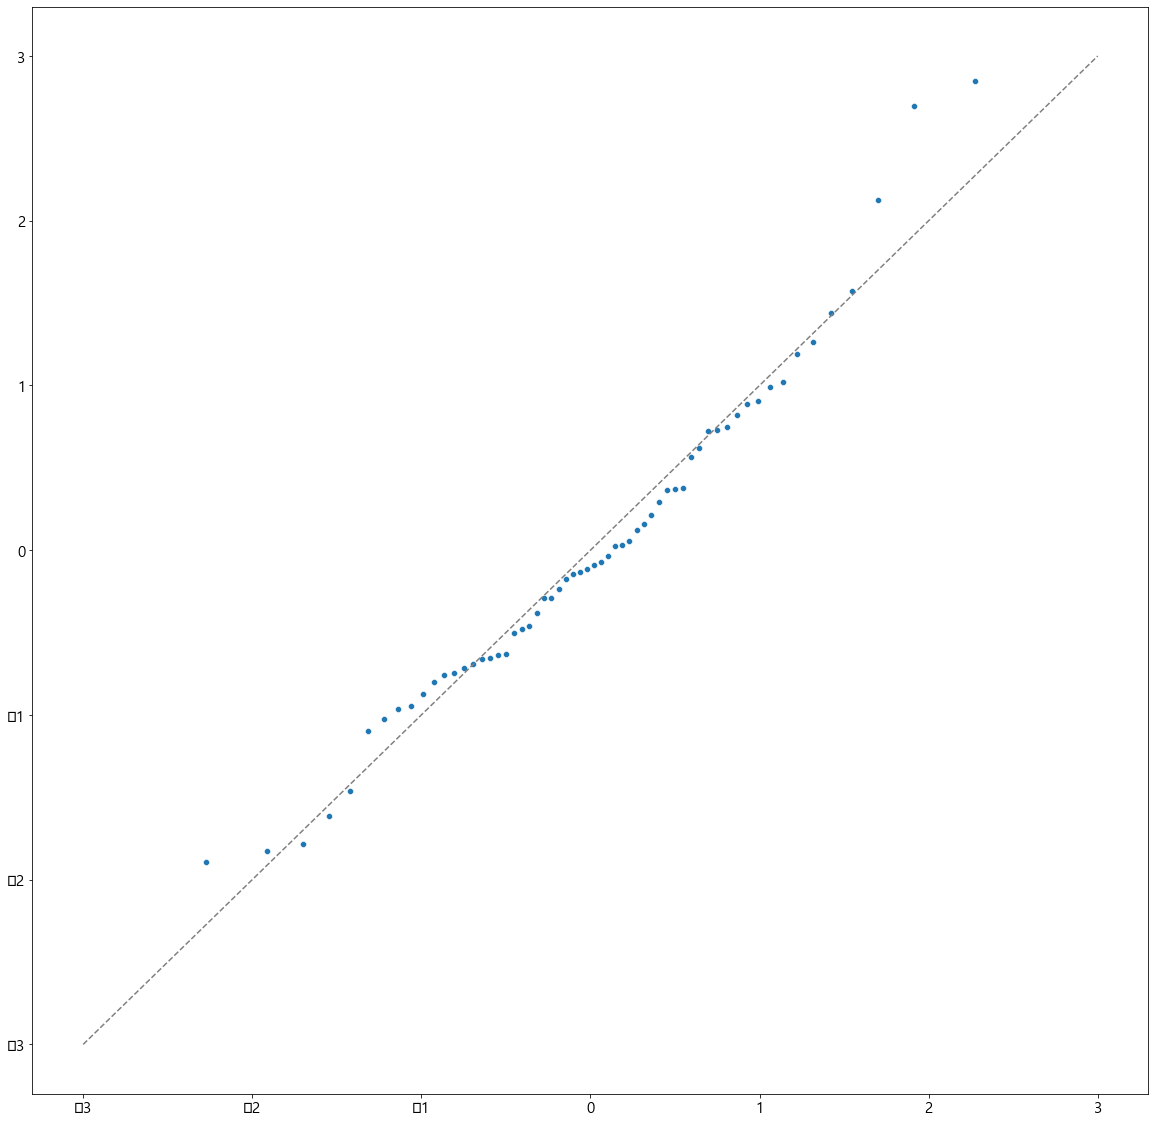

In [178]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

c:\Users\JongHwi\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

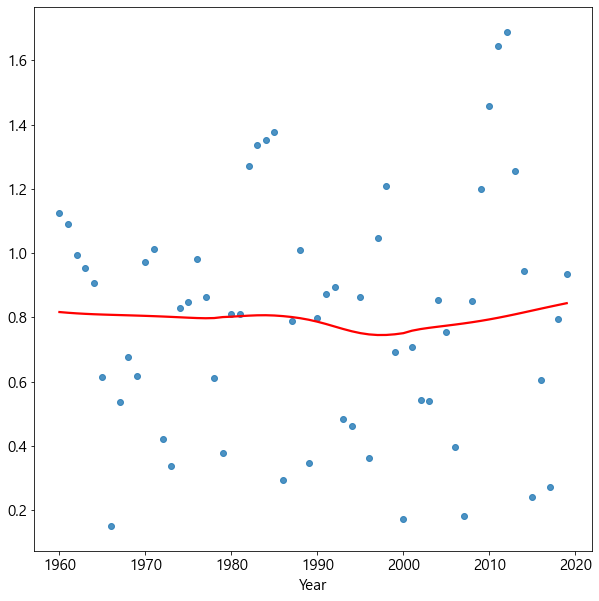

In [140]:
import numpy as np

sns.regplot(fitted.index, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})